In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/10Academy/Week6/Data/Complaints.csv'

## Loading the full dataset

In [ ]:
df = pd.read_csv(dataset_path)

/tmp/ipython-input-7-2793407076.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


## Loading the Product column only

Only the product column is loaded to save RAM for wordcloud analysis

If the full dataset was loaded into memory their would not be enough RAM for wordcloud analysis

In [ ]:
import pandas as pd
df_product = pd.read_csv(dataset_path, usecols=["Product"])

## Loading the Customer Narrative Column only

Only the customer narrative column is loaded to save RAM for word count analysis

In [ ]:
import pandas as pd
df_customer_complaint_narrative = pd.read_csv(dataset_path, usecols=["Consumer complaint narrative"])

# Initial EDA

## Analyzing the distribution of complaints accross different products

In [ ]:
# Generate word cloud
product_combined_text = " ".join(complaint for complaint in df_product["Product"])

### WordCloud Analysis

In [ ]:
!pip install wordcloud

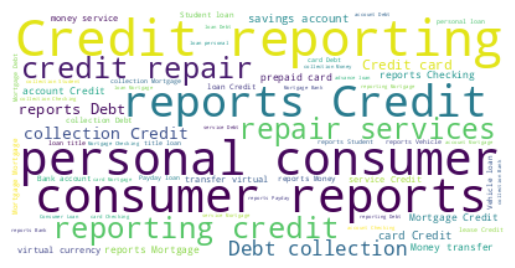

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(product_combined_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Barchart Analysis

/tmp/ipython-input-5-1568588519.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


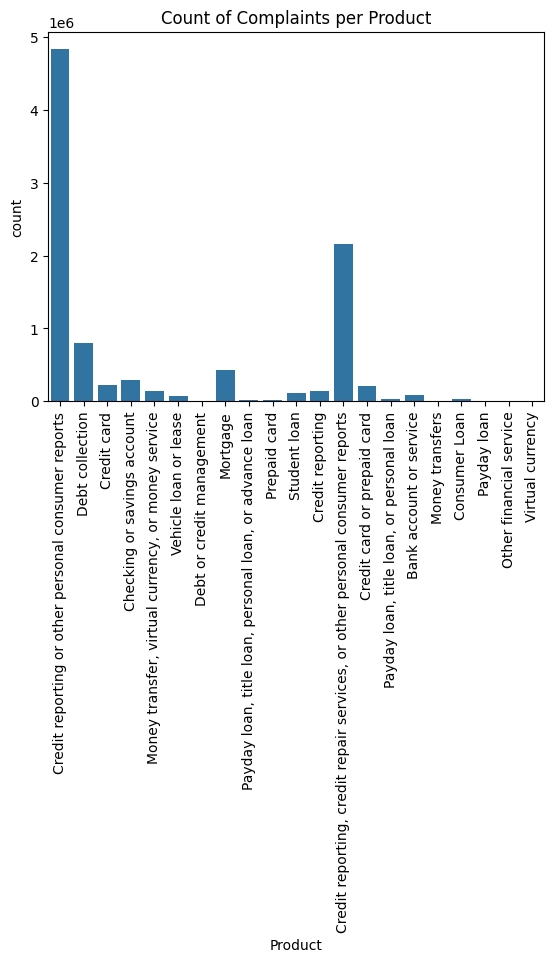

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_product, x='Product')
plt.xticks(rotation=90)
plt.title('Count of Complaints per Product')
plt.tight_layout()
plt.show()

## Calculate and visualize the length (word count) of the Consumer complaint narrative.

Remove the NA rows in Consumer complaint narrative to save RAM

In [ ]:
df_customer_complaint_narrative_filtered = df_customer_complaint_narrative[df_customer_complaint_narrative['Consumer complaint narrative'].notna()]

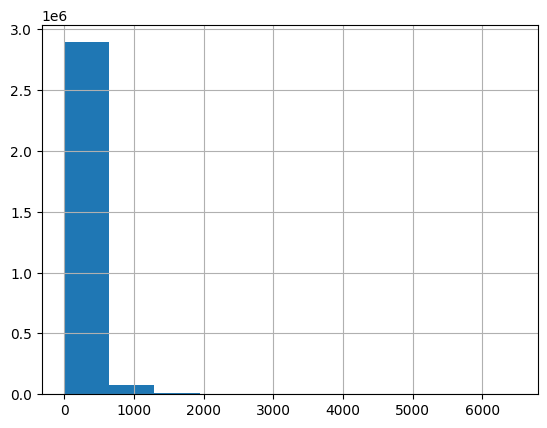

In [ ]:
def plot_word_number_histogram(text):
    # Convert dask dataframe to pandas dataframe

    text = text.str.replace(r'\s+', ' ', regex=True).str.strip()
    headlines_no_of_words = text.str.count(' ') + 1

    # # text_df = text.compute()
    # headlines_no_of_words = text.str.split().\
    #     map(lambda x: len(x))

    # # Get frequency of each word count
    # freq = headlines_no_of_words.value_counts().compute().sort_index()
    headlines_no_of_words.hist()

    # Plot as bar chart
    # freq.plot(kind='bar', title="Number of Words per Entry")

plot_word_number_histogram(df_customer_complaint_narrative_filtered["Consumer complaint narrative"])

## Identify the number of complaints with and without narratives.

In [ ]:
df_customer_complaint_narrative.isna().sum()

,0
Consumer complaint narrative,6629041


6629041 complaints do not have narratives

In [ ]:
df_customer_complaint_narrative.notna().sum()

,0
Consumer complaint narrative,2980756


2980756 complaints have narratives

# Filtering the Dataset to meet project requirements

## Filtering based on Product

No of products prior to filtering are shown below

In [ ]:
products_count = df['Product'].value_counts()
print(products_count)

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

Total row prior to filtering are shown below

In [11]:
len(df)

9609797

In [ ]:
products_filtered_df = df[df['Product'].str.contains(
'Credit card|Personal loan|Buy Now Pay Later|BNPL|Savings account|Money transfers'
,case=False, na=False)]

No of Products after filtering are shown below

In [10]:
product_complaint_count = products_filtered_df['Product'].value_counts()
print(product_complaint_count)

Product
Checking or savings account                                291178
Credit card                                                226686
Credit card or prepaid card                                206369
Payday loan, title loan, or personal loan                   30641
Payday loan, title loan, personal loan, or advance loan     16514
Money transfers                                              5354
Name: count, dtype: int64


Total rows after filtering are shown below

In [12]:
len(products_filtered_df)

776742

## Filtering based on presence of customer narrative

No of rows with NaN customer narratives, prior to filtering

In [15]:
products_filtered_df['Consumer complaint narrative'].isna().sum()

np.int64(419458)

In [19]:
final_filtered_data = products_filtered_df[products_filtered_df['Consumer complaint narrative'].notna()]

No of rows with NaN customer narratives, prior after filtering

In [20]:
final_filtered_data['Consumer complaint narrative'].isna().sum()

np.int64(0)

In [21]:
final_filtered_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121
12532,2025-06-13,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,ID,83815,NaN,Consent provided,Web,2025-06-13,Closed with explanation,Yes,NaN,14061897
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411


In [22]:
final_filtered_data.to_csv('/content/drive/My Drive/final_filtered_data.csv')

# Customer Narrative Normalization

## Lower Casing

In [24]:
final_filtered_data['normalized_narrative'] = final_filtered_data['Consumer complaint narrative'].str.lower()

/tmp/ipython-input-24-3424303112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data['normalized_narrative'] = final_filtered_data['Consumer complaint narrative'].str.lower()


## Removing special characters

### Removing Punctuations

In [26]:
import string
final_filtered_data['normalized_narrative'] = final_filtered_data['normalized_narrative'].str.translate(
    str.maketrans('', '', string.punctuation)
)

/tmp/ipython-input-26-1628278231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data['normalized_narrative'] = final_filtered_data['normalized_narrative'].str.translate(


### Remove leading and trailing whitespaces

In [27]:
final_filtered_data['normalized_narrative'] = final_filtered_data['normalized_narrative'].str.strip()

/tmp/ipython-input-27-2291237797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data['normalized_narrative'] = final_filtered_data['normalized_narrative'].str.strip()


### Replace multiple spaces with a single space

In [28]:
final_filtered_data['normalized_narrative'] = final_filtered_data['normalized_narrative'].str.replace(
    r'\s+', ' ', regex=True
)

/tmp/ipython-input-28-2704442085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_filtered_data['normalized_narrative'] = final_filtered_data['normalized_narrative'].str.replace(


Displaying the normalized column

In [29]:
final_filtered_data['normalized_narrative']

,normalized_narrative
12237,a xxxx xxxx card was opened under my name by a...
12532,i made the mistake of using my wellsfargo debi...
13280,dear cfpb i have a secured credit card with ci...
13506,i have a citi rewards cards the credit balance...
13955,bi am writing to dispute the following charges...
...,...
9609641,i had over 80 small charges many were for the ...
9609659,hello i recently signed up for a new citi prem...
9609687,omni financial loan paid for by allotment
9609735,i already have a case xxxx but it should not h...


## Loading the full complaint dataset

In [ ]:
import pandas as pd
df = pd.read_csv(dataset_path)

/tmp/ipython-input-40-3940466911.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [ ]:
import dask.dataframe as dd
ddf = dd.read_csv(dataset_path, blocksize="16MB", on_bad_lines='skip')

### Generating word count from frequencies

In [ ]:
!pip install wordcloud

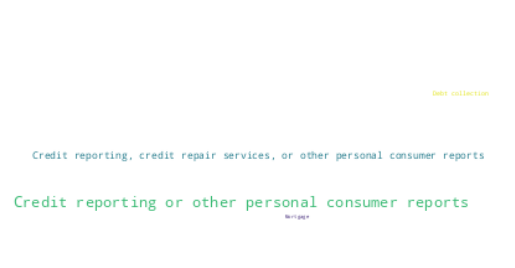

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Count frequencies of each unique product
product_counts = Counter(df["Product"])

# Generate word cloud from frequencies
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(product_counts)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dropping all cols except prod

Reading only the Product column from csv

In [ ]:
df_product.head()

,Product
0,Credit reporting or other personal consumer re...
1,Debt collection
2,Credit reporting or other personal consumer re...
3,Credit reporting or other personal consumer re...
4,Credit reporting or other personal consumer re...


In [ ]:
df_product = df[["Product"]]  # Keeps only the 'Product' column

In [ ]:
df_product.isna().sum()

,0
Product,0


In [ ]:
df_product.head()

,Product
0,Credit reporting or other personal consumer re...
1,Debt collection
2,Credit reporting or other personal consumer re...
3,Credit reporting or other personal consumer re...
4,Credit reporting or other personal consumer re...


In [ ]:
print(product_counts)

Counter({'Credit reporting or other personal consumer reports': 4834855, 'Credit reporting, credit repair services, or other personal consumer reports': 2163857, 'Debt collection': 799197, 'Mortgage': 422254, 'Checking or savings account': 291178, 'Credit card': 226686, 'Credit card or prepaid card': 206369, 'Money transfer, virtual currency, or money service': 145066, 'Credit reporting': 140429, 'Student loan': 109717, 'Bank account or service': 86205, 'Vehicle loan or lease': 72957, 'Consumer Loan': 31574, 'Payday loan, title loan, or personal loan': 30641, 'Payday loan, title loan, personal loan, or advance loan': 16514, 'Prepaid card': 15280, 'Payday loan': 5541, 'Money transfers': 5354, 'Debt or credit management': 5047, 'Other financial service': 1058, 'Virtual currency': 18})


## Guessing problematic row

In [ ]:
ddf.drop(columns=['Issue'])

,Date received,Product,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
npartitions=377,,,,,,,,,,,,,,,,,
,string,string,string,string,float64,string,string,string,string,float64,float64,string,string,string,string,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
ddf.head()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+------------------------------+--------+----------+
| Column                       | Found  | Expected |
+------------------------------+--------+----------+
| Consumer complaint narrative | object | float64  |
| Consumer consent provided?   | object | float64  |
| Tags                         | object | float64  |
+------------------------------+--------+----------+

The following columns also raised exceptions on conversion:

- Consumer complaint narrative
  ValueError("could not convert string to float: 'XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XXXX, XXXX, TX XXXX XXXX : XX/XX/XXXX TransUnion Consumer Solutions XXXX XXXX XXXX XXXX, PA XXXX XXXX : XXXX Re : Security Freeze Request Dear Sir/Madam, I, XXXX XXXX XXXX XXXX XXXX XXXX Social Security XXXX XXXX, a resident of XXXX XXXX XXXX XXXXXXXX XXXX XXXX  XXXX, TX XXXX, submit this affidavit to request a security freeze on my credit report. Pursuant to my rights under applicable federal and state laws, including but not limited to the Fair Credit Reporting Act and any other relevant regulations, I hereby formally request that a Security Freeze be placed on my credit file immediately. \\nAffidavit : Applicant Identification : Full Name : XXXX XXXX XXXX XXXX Social Security Number : XXXX Date of Birth : XX/XX/XXXX Current Address : XXXX XXXX XXXX XXXX Apt XXXX, XXXX XXXX TX XXXX XXXX XXXX Request : o I request that a security freeze be placed on my credit report to prevent unauthorized third-party access, except for those legally authorized or with my explicit consent. \\no This freeze should remain in place until I personally request its removal in writing, in compliance with applicable legal requirements. \\nAttached Documentation : I have attached the following documents to verify my identity and process my request : o A copy of my drivers license or government-issued ID. \\no A copy of a recent utility bill or bank statement confirming my current address. \\no A copy of my Social Security Number. \\nAffirmation : I declare under penalty of perjury that the information provided in this affidavit is true and correct to the best of my knowledge. This request is made in good faith to protect my credit information. \\nConfirmation Request : I hereby request written confirmation of the receipt and implementation of this security freeze request. I appreciate your prompt attention to this matter. \\nSincerely, XXXX XXXX XXXX XXXX'")
- Consumer consent provided?
  ValueError("could not convert string to float: 'Consent provided'")
- Tags
  ValueError("could not convert string to float: 'Servicemember'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'Consumer complaint narrative': 'object',
       'Consumer consent provided?': 'object',
       'Tags': 'object'}

to the call to `read_csv`/`read_table`.

In [ ]:
ddf = ddf.drop(columns=['Consumer complaint narrative', 'Consumer consent provided?', 'Tags'])

In [ ]:
ddf = dd.read_csv(
    dataset_path
)
# ddf = dd.read_csv(
#     dataset_path,
#     usecols=lambda col: col not in [
#         "Consumer complaint narrative",
#         "Consumer consent provided?",
#         "Tags",
#         "Consumer disputed?"
#     ]
# )

In [ ]:
ddf.head()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+------------------------------+--------+----------+
| Column                       | Found  | Expected |
+------------------------------+--------+----------+
| Consumer complaint narrative | object | float64  |
| Consumer consent provided?   | object | float64  |
| Consumer disputed?           | object | float64  |
| Tags                         | object | float64  |
+------------------------------+--------+----------+

The following columns also raised exceptions on conversion:

- Consumer complaint narrative
  ValueError("could not convert string to float: 'XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XXXX, XXXX, TX XXXX XXXX : XX/XX/XXXX TransUnion Consumer Solutions XXXX XXXX XXXX XXXX, PA XXXX XXXX : XXXX Re : Security Freeze Request Dear Sir/Madam, I, XXXX XXXX XXXX XXXX XXXX XXXX Social Security XXXX XXXX, a resident of XXXX XXXX XXXX XXXXXXXX XXXX XXXX  XXXX, TX XXXX, submit this affidavit to request a security freeze on my credit report. Pursuant to my rights under applicable federal and state laws, including but not limited to the Fair Credit Reporting Act and any other relevant regulations, I hereby formally request that a Security Freeze be placed on my credit file immediately. \\nAffidavit : Applicant Identification : Full Name : XXXX XXXX XXXX XXXX Social Security Number : XXXX Date of Birth : XX/XX/XXXX Current Address : XXXX XXXX XXXX XXXX Apt XXXX, XXXX XXXX TX XXXX XXXX XXXX Request : o I request that a security freeze be placed on my credit report to prevent unauthorized third-party access, except for those legally authorized or with my explicit consent. \\no This freeze should remain in place until I personally request its removal in writing, in compliance with applicable legal requirements. \\nAttached Documentation : I have attached the following documents to verify my identity and process my request : o A copy of my drivers license or government-issued ID. \\no A copy of a recent utility bill or bank statement confirming my current address. \\no A copy of my Social Security Number. \\nAffirmation : I declare under penalty of perjury that the information provided in this affidavit is true and correct to the best of my knowledge. This request is made in good faith to protect my credit information. \\nConfirmation Request : I hereby request written confirmation of the receipt and implementation of this security freeze request. I appreciate your prompt attention to this matter. \\nSincerely, XXXX XXXX XXXX XXXX'")
- Consumer consent provided?
  ValueError("could not convert string to float: 'Consent provided'")
- Consumer disputed?
  ValueError("could not convert string to float: 'No'")
- Tags
  ValueError("could not convert string to float: 'Servicemember'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'Consumer complaint narrative': 'object',
       'Consumer consent provided?': 'object',
       'Consumer disputed?': 'object',
       'Tags': 'object'}

to the call to `read_csv`/`read_table`.

In [ ]:
# This returns a list of dtypes, one for each partition
dtypes_per_partition = ddf.map_partitions(lambda df: df[['Product']].dtypes).compute()

print(dtypes_per_partition)

ParserError: Error tokenizing data. C error: EOF inside string starting at row 25224

In [ ]:
ddf.to_parquet('/content/drive/My Drive/data_parquet/')

ParserError: Error tokenizing data. C error: EOF inside string starting at row 25224

In [ ]:
column_type_issue_row = ddf.iloc[25224]

NotImplementedError: 'DataFrame.iloc' only supports selecting columns. It must be used like 'df.iloc[:, column_indexer]'.

### Insepcting the troublesome row

In [ ]:
import pandas as pd

nrows = 25230

df_partial = pd.read_csv(dataset_path, nrows=nrows)
# df_sample = pd.read_csv(dataset_path, skiprows=range(, skip_before), nrows=nrows, header=0)
# print(df_sample)

In [ ]:
df_partial.iloc[[25223, 25224, 25225]]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
25223,2025-06-19,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33579,NaN,NaN,Web,2025-06-19,In progress,Yes,NaN,14145697
25224,2025-06-18,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Investigation took more than 30 days,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",WI,53212,NaN,NaN,Web,2025-06-18,In progress,Yes,NaN,14144077
25225,2025-06-18,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,VA,22302,NaN,NaN,Web,2025-06-18,In progress,Yes,NaN,14146721


In [ ]:
import pandas as pd

df = pd.read_csv(dataset_path)

/tmp/ipython-input-5-2295456838.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


## Convert dataset into parquet format

In [ ]:
import dask.dataframe as dd

ddf = dd.from_pandas(df, npartitions=200)
ddf.to_parquet('/content/drive/My Drive/data_parquet.csv')

NameError: name 'df' is not defined

In [ ]:
# Save DataFrame to Parquet
df.to_parquet("data.parquet")

In [ ]:
row = df.iloc[]
print(row)

In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [ ]:
df.tail()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
9609792,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
9609793,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
9609794,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
9609795,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118
9609796,2014-11-10,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,"EQUIFAX, INC.",CA,95616,NaN,NaN,Postal mail,2014-11-25,Closed with explanation,Yes,No,1110751


## Performing Initial EDA

Analyzing the distribution of complaints across different Products.


Visualizing using word cloud

In [ ]:
!pip install wordcloud

In [ ]:
product_combined_text = " ".join(complaint for complaint in df["Product"])

In [ ]:
from wordcloud import WordCloud
# Generate word cloud

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(product_combined_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Visualizing using Bar Chart

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Product')
plt.xticks(rotation=90)
plt.title('Count of Complaints per Product')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

6629041 records do not have customer narratvies, hence they will be dropped

In [ ]:
df.isna().sum()

,0
Date received,0
Product,0
Sub-product,235295
Issue,6
Sub-issue,839522
Consumer complaint narrative,6629041
Company public response,4770207
Company,0
State,54516
ZIP code,30228


## Filtering Dataset

In [ ]:
filtered_df = df[df['Consumer complaint narrative'].notna()]

In [ ]:
filtered_df.to_csv("/filtered_customer_complaint.csv")

NameError: name 'filtered_df' is not defined

## Anlayzing the distributions of comments across products

Installing word_cloud

In [ ]:
!git clone https://github.com/amueller/word_cloud.git
!cd word_cloud
!pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 6763, done.
remote: Counting objects: 100% (828/828), done.
remote: Compressing objects: 100% (145/145), done.
remote: Total 6763 (delta 730), reused 684 (delta 682), pack-reused 5935 (from 4)
Receiving objects: 100% (6763/6763), 117.03 MiB | 30.93 MiB/s, done.
Resolving deltas: 100% (3999/3999), done.
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
import matplotlib.pyplot as plt
!% matplotlib inline

/bin/bash: line 1: fg: no job control


In [ ]:
print(filtered_df.loc[11499, 'Consumer complaint narrative'])

I signed a purchase agreement with Lennar Corporation on XX/XX/year>, for a new construction home in XXXX, Illinois that was not scheduled to be built until XXXX of XXXX. I submitted a total deposit of {$15000.00} based on monthly mortgage payment estimates and a home price that were provided to me by Lennars representatives. These payment figures were communicated informally through text messages, emails and not through proper loan disclosures. 

After I paid the full deposit, Lennar informed me that those numbers were incorrect and that I could no longer receive the previously quoted terms. Their disclosures also changed multiple times, and after I raised concerns, Lennar revoked my access to their loan portal preventing me from reviewing or documenting the various versions of those disclosures.

When I asked for a refund based on these errors, Lennar refused. Instead, they stated that I was in default and would lose the entire deposit unless I agreed to purchase another Lennar home.

In [ ]:
text = filtered_df["Consumer complaint narrative"][11499]
print(text)

I signed a purchase agreement with Lennar Corporation on XX/XX/year>, for a new construction home in XXXX, Illinois that was not scheduled to be built until XXXX of XXXX. I submitted a total deposit of {$15000.00} based on monthly mortgage payment estimates and a home price that were provided to me by Lennars representatives. These payment figures were communicated informally through text messages, emails and not through proper loan disclosures. 

After I paid the full deposit, Lennar informed me that those numbers were incorrect and that I could no longer receive the previously quoted terms. Their disclosures also changed multiple times, and after I raised concerns, Lennar revoked my access to their loan portal preventing me from reviewing or documenting the various versions of those disclosures.

When I asked for a refund based on these errors, Lennar refused. Instead, they stated that I was in default and would lose the entire deposit unless I agreed to purchase another Lennar home.

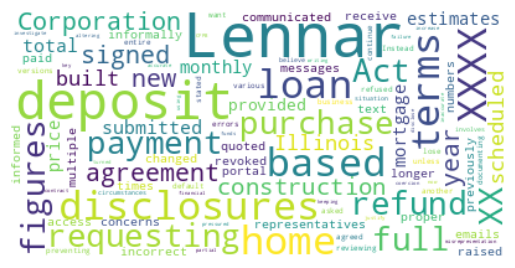

In [ ]:
# Start with one review:

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("first_review.png")

## Combine customer complaints into one big text

In [ ]:
text = " ".join(complaint for complaint in filtered_df["Consumer complaint narrative"])

## Combine products into one big text

In [ ]:
# Load filtered data
dataset_path = '/content/drive/My Drive/filtered_data.csv'

In [ ]:
import pandas as pd
filtered_df = pd.read_csv(dataset_path)

In [ ]:
product_combined_text = " ".join(complaint for complaint in filtered_df["Product"])

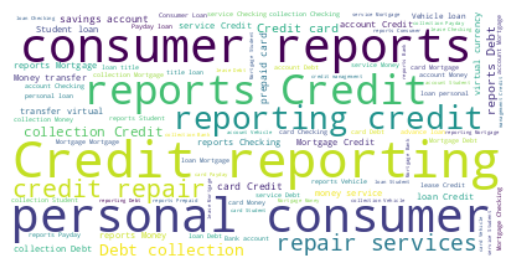

In [ ]:
# Generate word cloud

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(product_combined_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
filtered_df.to_csv('/content/drive/MyDrive/filtered_data.csv', index=False)

## Visualize product complaints using polar bar charts

In [ ]:
product_complaint_count = filtered_df['Product'].value_counts()
print(product_complaint_count)

Product
Credit reporting or other personal consumer reports                             1091253
Credit reporting, credit repair services, or other personal consumer reports     807281
Debt collection                                                                  336076
Checking or savings account                                                      140319
Mortgage                                                                         130160
Credit card or prepaid card                                                      108667
Money transfer, virtual currency, or money service                                97188
Credit card                                                                       80667
Student loan                                                                      53209
Vehicle loan or lease                                                             39577
Credit reporting                                                                  31587
Payday loan, title loan,

In [ ]:
grouped_df = filtered_df.groupby('Product')

## Visuzlize word count

In [ ]:
# Load filtered data
dataset_path = '/content/drive/My Drive/filtered_data.csv'

In [ ]:
import pandas as pd
filtered_df = pd.read_csv(dataset_path)
# filtered_dask_df = dd.read_csv(dataset_path, dtype={'Consumer disputed?': 'object'}, on_bad_lines="skip", engine='python')

In [ ]:
filtered_dask_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-03-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,<NA>,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75211,<NA>,Consent provided,Web,2025-03-06,Closed with explanation,Yes,<NA>,12351447
1,2025-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,Subject : Dispute of Unauthorized Hard Inquiri...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,<NA>,Consent provided,Web,2025-02-26,Closed with explanation,Yes,<NA>,12203565
2,2025-06-15,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,I signed a purchase agreement with Lennar Corp...,Company has responded to the consumer and the ...,"Lennar Financial Services, LLC",IL,60538,<NA>,Consent provided,Web,2025-06-15,Closed with explanation,Yes,<NA>,14089944
3,2025-06-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"After checking my report, I found numerous acc...",Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",FL,32303,<NA>,Consent provided,Web,2025-06-14,Closed with explanation,Yes,<NA>,14080390
4,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,<NA>,14069121


In [ ]:
filtered_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-03-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,NaN,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75211,NaN,Consent provided,Web,2025-03-06,Closed with explanation,Yes,NaN,12351447
1,2025-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,Subject : Dispute of Unauthorized Hard Inquiri...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,NaN,Consent provided,Web,2025-02-26,Closed with explanation,Yes,NaN,12203565
2,2025-06-15,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,I signed a purchase agreement with Lennar Corp...,Company has responded to the consumer and the ...,"Lennar Financial Services, LLC",IL,60538,NaN,Consent provided,Web,2025-06-15,Closed with explanation,Yes,NaN,14089944
3,2025-06-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"After checking my report, I found numerous acc...",Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",FL,32303,NaN,Consent provided,Web,2025-06-14,Closed with explanation,Yes,NaN,14080390
4,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121


Extracting Unique Product Values

In [ ]:
unique_product_values = df['Product'].unique()
print(unique_product_values)

['Credit reporting or other personal consumer reports' 'Debt collection'
 'Credit card' 'Checking or savings account'
 'Money transfer, virtual currency, or money service'
 'Vehicle loan or lease' 'Debt or credit management' 'Mortgage'
 'Payday loan, title loan, personal loan, or advance loan' 'Prepaid card'
 'Student loan' 'Credit reporting'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Credit card or prepaid card' 'Payday loan, title loan, or personal loan'
 'Bank account or service' 'Money transfers' 'Consumer Loan' 'Payday loan'
 'Other financial service' 'Virtual currency']


Extracting Unique Sub Product Values

In [ ]:
unique_sub_product_values = df['Sub-product'].unique()
print(unique_sub_product_values)

['Credit reporting' 'Telecommunications debt' 'I do not know' 'Other debt'
 'Credit card debt' 'Rental debt' 'Medical debt'
 'General-purpose credit card or charge card' 'Checking account'
 'Auto debt' 'Virtual currency' 'Federal student loan debt'
 'Domestic (US) money transfer' 'Savings account' 'Loan'
 'Other personal consumer report' 'Credit repair services'
 'Reverse mortgage' 'Payday loan'
 'Home equity loan or line of credit (HELOC)' 'Store credit card' 'Lease'
 'Personal line of credit' 'Installment loan' 'Foreign currency exchange'
 'General-purpose prepaid card' 'Mobile or digital wallet'
 'Federal student loan servicing' 'Conventional home mortgage'
 'Other banking product or service' 'International money transfer'
 'Payday loan debt' 'CD (Certificate of Deposit)' 'VA mortgage'
 'FHA mortgage' 'Check cashing service' 'Debt settlement'
 'Private student loan' 'Gift card' 'Other advances of future income'
 'Title loan' 'USDA mortgage' 'Private student loan debt' 'Payroll card'

Identifying the number of complaints with and without Customer narratives

In [ ]:
df['Product']

,Product
0,Credit reporting or other personal consumer re...
1,Debt collection
2,Credit reporting or other personal consumer re...
3,Credit reporting or other personal consumer re...
4,Credit reporting or other personal consumer re...
...,...
9609792,Credit reporting
9609793,"Credit reporting, credit repair services, or o..."
9609794,Credit reporting
9609795,Credit reporting


In [ ]:
print(df.loc[5, 'Product'])

Credit reporting or other personal consumer reports


In [ ]:
print(df.loc[9609793, 'Product'])

Credit reporting, credit repair services, or other personal consumer reports


In [ ]:
print(df['Product'].head().to_string())

0    Credit reporting or other personal consumer re...
1                                      Debt collection
2    Credit reporting or other personal consumer re...
3    Credit reporting or other personal consumer re...
4    Credit reporting or other personal consumer re...


In [ ]:
filtered_data = df[df['Consumer complaint narrative'] != None]

In [ ]:
filtered_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [ ]:
len(df)

9609797

In [ ]:
len(filtered_data)

9609797

In [ ]:
filtered_data = df[df['Consumer complaint narrative'].isna()]

In [ ]:
len(filtered_data)

6629041

In [ ]:
filtered_df = df[df['Consumer complaint narrative'].notna()]

In [ ]:
len(filtered_df)

2980756

In [ ]:
filtered_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
76,2025-03-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,NaN,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75211,NaN,Consent provided,Web,2025-03-06,Closed with explanation,Yes,NaN,12351447
359,2025-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,Subject : Dispute of Unauthorized Hard Inquiri...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,NaN,Consent provided,Web,2025-02-26,Closed with explanation,Yes,NaN,12203565
11499,2025-06-15,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,I signed a purchase agreement with Lennar Corp...,Company has responded to the consumer and the ...,"Lennar Financial Services, LLC",IL,60538,NaN,Consent provided,Web,2025-06-15,Closed with explanation,Yes,NaN,14089944
11973,2025-06-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"After checking my report, I found numerous acc...",Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",FL,32303,NaN,Consent provided,Web,2025-06-14,Closed with explanation,Yes,NaN,14080390
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121


In [ ]:
print(filtered_df.loc[11499, 'Consumer complaint narrative'])

I signed a purchase agreement with Lennar Corporation on XX/XX/year>, for a new construction home in XXXX, Illinois that was not scheduled to be built until XXXX of XXXX. I submitted a total deposit of {$15000.00} based on monthly mortgage payment estimates and a home price that were provided to me by Lennars representatives. These payment figures were communicated informally through text messages, emails and not through proper loan disclosures. 

After I paid the full deposit, Lennar informed me that those numbers were incorrect and that I could no longer receive the previously quoted terms. Their disclosures also changed multiple times, and after I raised concerns, Lennar revoked my access to their loan portal preventing me from reviewing or documenting the various versions of those disclosures.

When I asked for a refund based on these errors, Lennar refused. Instead, they stated that I was in default and would lose the entire deposit unless I agreed to purchase another Lennar home.

## Filter only products of interest

In [ ]:
# Load filtered data
dataset_path = '/content/drive/My Drive/filtered_data.csv'

In [ ]:
import pandas as pd
filtered_df = pd.read_csv(dataset_path)

In [ ]:
filtered_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-03-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,NaN,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75211,NaN,Consent provided,Web,2025-03-06,Closed with explanation,Yes,NaN,12351447
1,2025-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,Subject : Dispute of Unauthorized Hard Inquiri...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,NaN,Consent provided,Web,2025-02-26,Closed with explanation,Yes,NaN,12203565
2,2025-06-15,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,I signed a purchase agreement with Lennar Corp...,Company has responded to the consumer and the ...,"Lennar Financial Services, LLC",IL,60538,NaN,Consent provided,Web,2025-06-15,Closed with explanation,Yes,NaN,14089944
3,2025-06-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"After checking my report, I found numerous acc...",Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",FL,32303,NaN,Consent provided,Web,2025-06-14,Closed with explanation,Yes,NaN,14080390
4,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121


In [ ]:
print(len(filtered_df))

2980756


In [ ]:
products_filtered_df = filtered_df[filtered_df['Product'].str.contains(
'Credit card|Personal loan|Buy Now Pay Later|BNPL|Savings account|Money transfers'
,case=False, na=False)]

In [ ]:
products_filtered_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
4,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121
5,2025-06-13,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,ID,83815,NaN,Consent provided,Web,2025-06-13,Closed with explanation,Yes,NaN,14061897
6,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,NaN,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,NaN,14047085
10,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,NaN,Consent provided,Web,2025-06-12,Closed with explanation,Yes,NaN,14040217
15,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,NaN,13968411


In [ ]:

print(len(products_filtered_df))

357284


In [ ]:
product_complaint_count = filtered_df['Product'].value_counts()
print(product_complaint_count)

Product
Checking or savings account                                140319
Credit card or prepaid card                                108667
Credit card                                                 80667
Payday loan, title loan, or personal loan                   17238
Payday loan, title loan, personal loan, or advance loan      8896
Money transfers                                              1497
Name: count, dtype: int64


## Save to Drive

In [ ]:
dataset_path = '/content/drive/My Drive/V2_products_filtered_data.csv'

In [ ]:
products_filtered_df.to_csv(dataset_path)

In [ ]:
products_filtered_df.isna().sum()

,0
Date received,0
Product,0
Sub-product,18873
Issue,0
Sub-issue,46408
Consumer complaint narrative,0
Company public response,187411
Company,0
State,1757
ZIP code,0


## Preprocess dataset for